In [1]:
import protocols 
from matplotlib import pyplot as plt
from setting import Setting

setting = Setting(host_num=3, total_time=100, packet_num=4, max_collision_wait_time=20, p_resend=0.3, packet_size=3, link_delay=1, seed=4)
print('aloha')
result = protocols.aloha(setting, True)
print('success_rate:', result[0])
print('idle_rate:', result[1])
print('collision_rate:', result[2])

print('slotted_aloha')
result = protocols.slotted_aloha(setting, True)
print('success_rate:', result[0])
print('idle_rate:', result[1])
print('collision_rate:', result[2])

print('csma')
result = protocols.csma(setting, 0, True)
print('success_rate:', result[0])
print('idle_rate:', result[1])
print('collision_rate:', result[2])

print('csma_cd')
result = protocols.csma_cd(setting, 0, True)
print('success_rate:', result[0])
print('idle_rate:', result[1])
print('collision_rate:', result[2])

aloha
                  V                V       V                                                     V      
h0: ..............<---|.......<---|...........<---|.....<---|........<---|........<---|.....<---|.......
                V       V                              V          V                                     
h1: ............<---|.<---|................<---|........<---|......<---|....................<---|.......
       V     V                                          V                  V                            
h2: ...<--->.<---|.........<---|.................<---|...<---|<---><---|........<---|......<---|........
success_rate: 0.1
idle_rate: 0.31
collision_rate: 0.59
slotted_aloha
                  V                V       V                                                     V      
h0: ...............<---|...............<---><---><--->.............................................<--->
                V       V                              V          V                  

In [2]:
# Code Test
test_setting = Setting(host_num=3, total_time=100, packet_num=4, max_collision_wait_time=20, p_resend=0.3, packet_size=3, link_delay=1, seed=110550163)
print('aloha')
result = protocols.aloha(test_setting, True)
print('success_rate:', result[0])
print('idle_rate:', result[1])
print('collision_rate:', result[2])

print('slotted_aloha')
result = protocols.slotted_aloha(test_setting, True)
print('success_rate:', result[0])
print('idle_rate:', result[1])
print('collision_rate:', result[2])

print('csma')
result = protocols.csma(test_setting, 0, True)
print('success_rate:', result[0])
print('idle_rate:', result[1])
print('collision_rate:', result[2])

print('csma_cd')
result = protocols.csma_cd(test_setting, 0, True)
print('success_rate:', result[0])
print('idle_rate:', result[1])
print('collision_rate:', result[2])

aloha
                                      V    VV             V                                             
h0: ..................................<---><---><---|...................<---|....................<---|..
                                                V                          V   V                V       
h1: ............................................<---|....................<---|.<---|................<---
            V         V                                        V                V                       
h2: ........<--->.....<--->....................................<--->............<---|..<--->............
success_rate: 0.3
idle_rate: 0.46
collision_rate: 0.24
slotted_aloha
                                      V    VV             V                                             
h0: ...................................<---><---><---|....................<---><---|<---|<---|..........
                                                V                          V   V     

In [3]:
class whole_result:
    def __init__(self):
        self.aloha_success = list()
        self.aloha_idle = list()
        self.aloha_collision = list()
        self.slotted_aloha_success = list()
        self.slotted_aloha_idle = list()
        self.slotted_aloha_collision = list()
        self.csma_success = list()
        self.csma_idle = list()
        self.csma_collision = list()
        self.csma_cd_success = list()
        self.csma_cd_idle = list()
        self.csma_cd_collision = list()
    
    def test(self, settings):
        for s in settings:
            
            x = protocols.aloha(s, False)
            self.aloha_success.append(x[0])
            self.aloha_idle.append(x[1])
            self.aloha_collision.append(x[2])
            x = protocols.slotted_aloha(s, False)
            self.slotted_aloha_success.append(x[0])
            self.slotted_aloha_idle.append(x[1])
            self.slotted_aloha_collision.append(x[2])
            x = protocols.csma(s, 0, False)
            self.csma_success.append(x[0])
            self.csma_idle.append(x[1])
            self.csma_collision.append(x[2])
            x = protocols.csma_cd(s, 0, False)
            self.csma_cd_success.append(x[0])
            self.csma_cd_idle.append(x[1])
            self.csma_cd_collision.append(x[2])
            

    def plot_success(self, title, xlabel, x):
        markers = ['x', 's', '^', 'o']
        colors = ['#000000', '#ff0000', '#00ff00', '#0000ff']
        plt.plot(x, self.aloha_success, marker=markers[0], color=colors[0])
        plt.plot(x, self.slotted_aloha_success, marker=markers[1], color=colors[1])
        plt.plot(x, self.csma_success, marker=markers[2], color=colors[2])
        plt.plot(x, self.csma_cd_success, marker=markers[3], color=colors[3])

        plt.legend(["aloha", "slotted_aloha", "csma", "csma_cd"])
        plt.xlabel(xlabel)
        plt.ylabel('Success rate')
        plt.title(title)
        plt.show()

    def plot_idle(self, title, xlabel, x):
        markers = ['x', 's', '^', 'o']
        colors = ['#000000', '#ff0000', '#00ff00', '#0000ff']
        plt.plot(x, self.aloha_idle, marker=markers[0], color=colors[0])
        plt.plot(x, self.slotted_aloha_idle, marker=markers[1], color=colors[1])
        plt.plot(x, self.csma_idle, marker=markers[2], color=colors[2])
        plt.plot(x, self.csma_cd_idle, marker=markers[3], color=colors[3])

        plt.legend(["aloha", "slotted_aloha", "csma", "csma_cd"])
        plt.xlabel(xlabel)
        plt.ylabel('Idle rate')
        plt.title(title)
        plt.show()

    def plot_collision(self, title, xlabel, x):
        markers = ['x', 's', '^', 'o']
        colors = ['#000000', '#ff0000', '#00ff00', '#0000ff']
        plt.plot(x, self.aloha_collision, marker=markers[0], color=colors[0])
        plt.plot(x, self.slotted_aloha_collision, marker=markers[1], color=colors[1])
        plt.plot(x, self.csma_collision, marker=markers[2], color=colors[2])
        plt.plot(x, self.csma_cd_collision, marker=markers[3], color=colors[3])

        plt.legend(["aloha", "slotted_aloha", "csma", "csma_cd"])
        plt.xlabel(xlabel)
        plt.ylabel('Collision rate')
        plt.title(title)
        plt.show()

    def plot(self, title, xlabel, x):    
        self.plot_success(title, xlabel, x)
        self.plot_idle(title, xlabel, x)
        self.plot_collision(title, xlabel, x)

    def Q8_test(self, settings):
        for s in settings:
            x = protocols.csma(s, 0, False)
            self.csma_success.append(x[0])
            self.csma_idle.append(x[1])
            self.csma_collision.append(x[2])
            x = protocols.csma_cd(s, 0, False)
            self.csma_cd_success.append(x[0])
            self.csma_cd_idle.append(x[1])
            self.csma_cd_collision.append(x[2])

    def Q8_plot(self, title, xlabel, x):
        markers = ['x', 's', '^', 'o']
        colors = ['#000000', '#ff0000', '#00ff00', '#0000ff']
        plt.plot(x, self.csma_success, marker=markers[0], color=colors[0])
        plt.plot(x, self.csma_cd_success, marker=markers[1], color=colors[1])
        plt.legend(["csma", "csma_cd"])
        plt.xlabel(xlabel)
        plt.ylabel('Success rate')
        plt.title(title)
        plt.show()

        plt.plot(x, self.csma_idle, marker=markers[0], color=colors[0])
        plt.plot(x, self.csma_cd_idle, marker=markers[1], color=colors[1])
        plt.legend(["csma", "csma_cd"])
        plt.xlabel(xlabel)
        plt.ylabel('Idle rate')
        plt.title(title)
        plt.show()

        plt.plot(x, self.csma_collision, marker=markers[0], color=colors[0])
        plt.plot(x, self.csma_cd_collision, marker=markers[1], color=colors[1])
        plt.legend(["csma", "csma_cd"])
        plt.xlabel(xlabel)
        plt.ylabel('Collision rate')
        plt.title(title)
        plt.show()


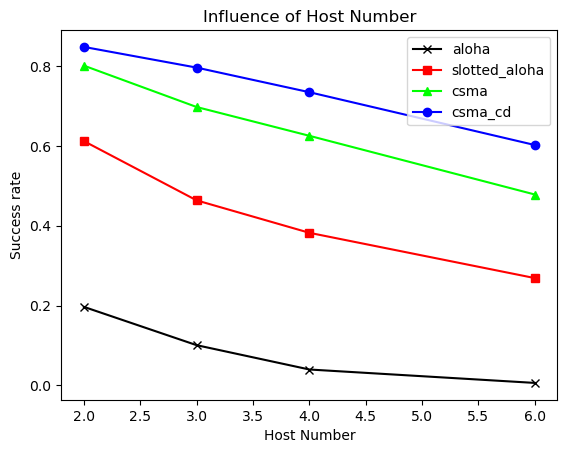

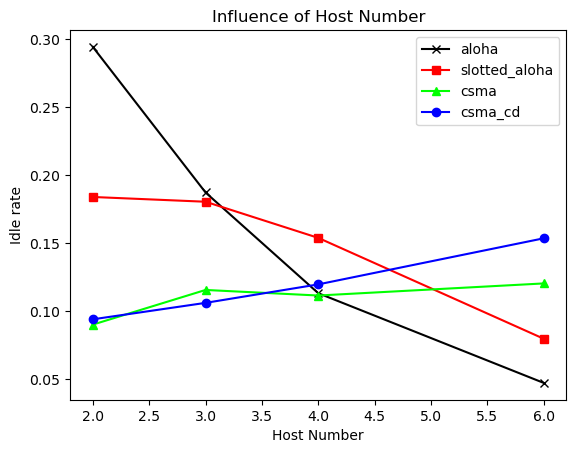

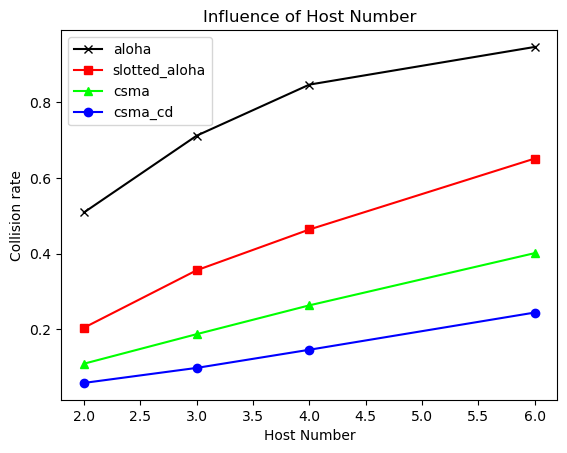

In [4]:
# Instantiate the whole_result class
Q2 = whole_result()

# Define the parameters
packet_num_list = [1200, 800, 600, 400]
host_num_list = [2, 3, 4, 6]
n = 10

# Test the protocols and collect results
Q2_settings = [Setting(host_num=h, packet_num=p, max_collision_wait_time=20, p_resend=0.3) for h, p in zip(host_num_list, packet_num_list)]
Q2.test(Q2_settings)

# Plot the results
Q2.plot('Influence of Host Number', 'Host Number', host_num_list)


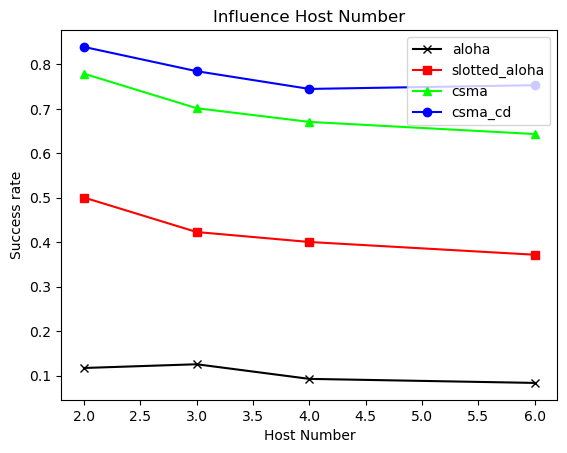

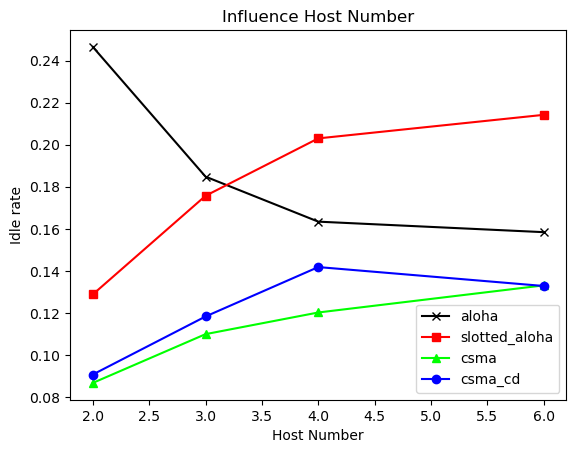

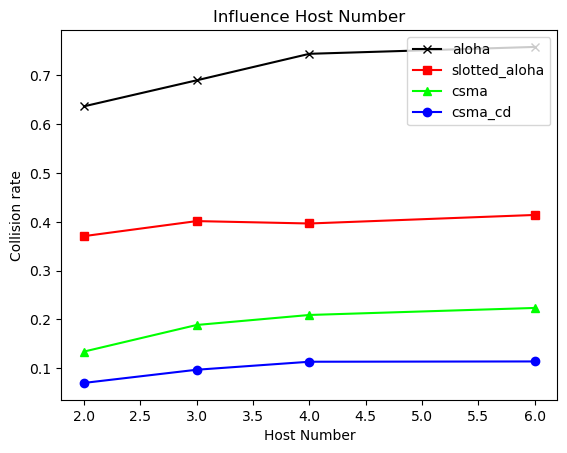

In [5]:
# Q3 simpler version
packet_num_list = [1200,800,600,400]
host_num_list = [2,3,4,6]

Q3 = whole_result()
Q3_settings = [Setting(host_num=h, packet_num=p, coefficient=1) for h, p in zip(host_num_list, packet_num_list)]

Q3.test(Q3_settings)
Q3.plot('Influence Host Number', 'Host Number', host_num_list)

500


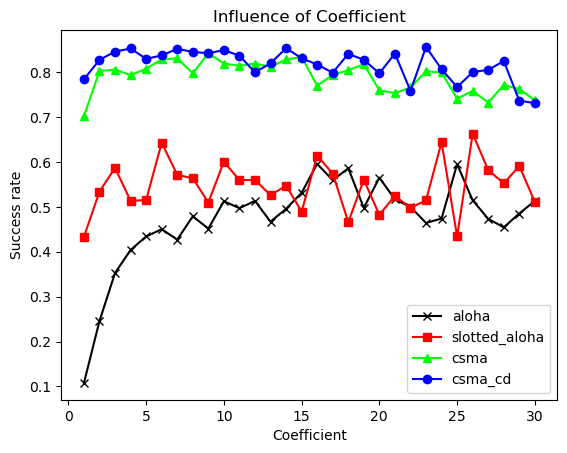

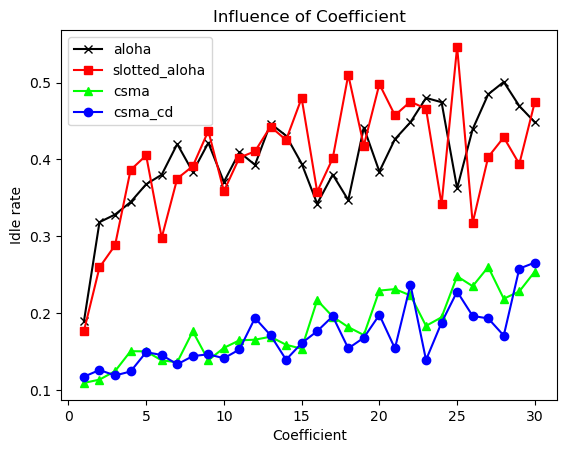

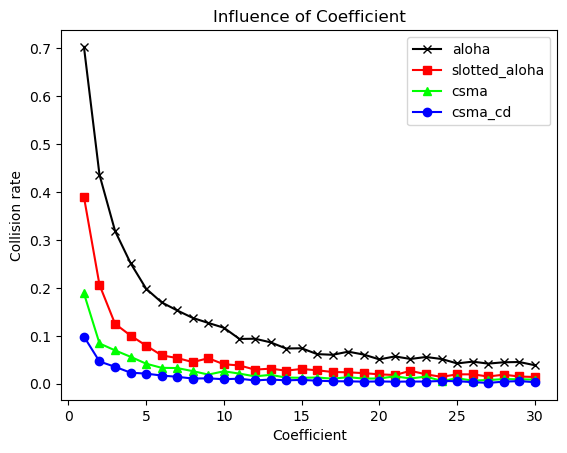

In [6]:
# Q4

c = [i for i in range(1, 31)]
Q4_settings = [Setting(coefficient=i) for i in range(1, 31)]
print(Q4_settings[0].packet_num)
Q4 = whole_result()
Q4.test(Q4_settings)

Q4.plot('Influence of Coefficient', 'Coefficient', c)



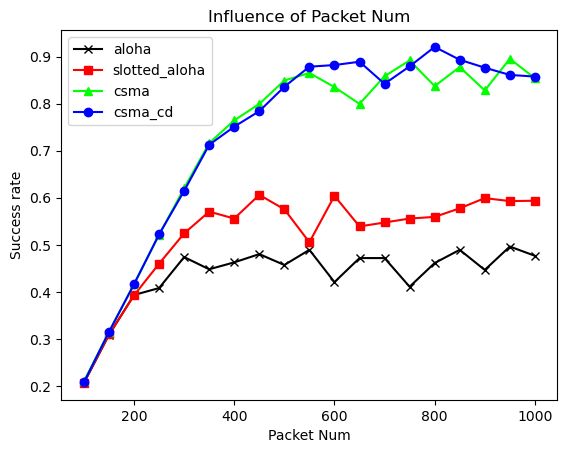

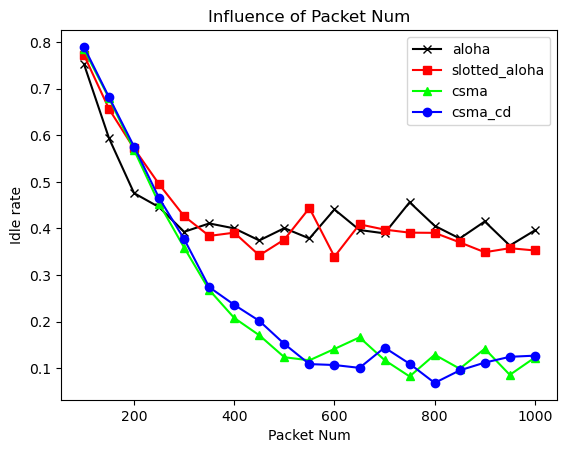

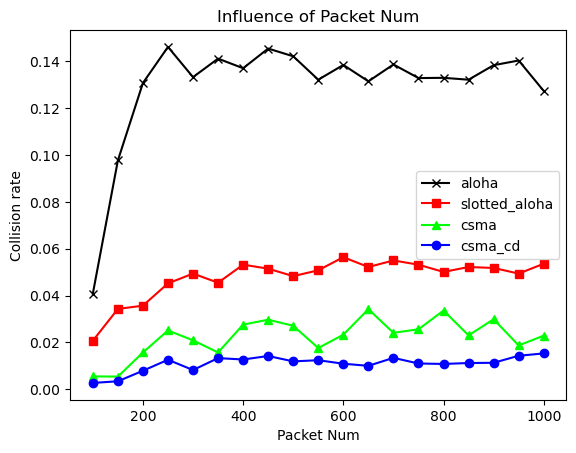

In [7]:
# Q5
pkt_num = [i for i in range(100, 1050, 50)]
Q5_settings = [Setting(packet_num=i) for i in pkt_num]
Q5 = whole_result()
Q5.test(Q5_settings)
Q5.plot('Influence of Packet Num', 'Packet Num', pkt_num)

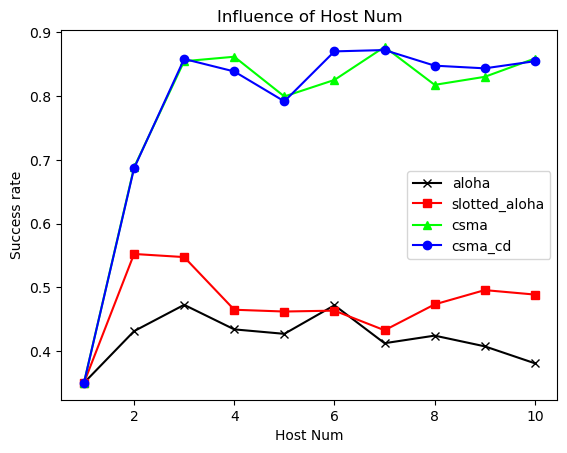

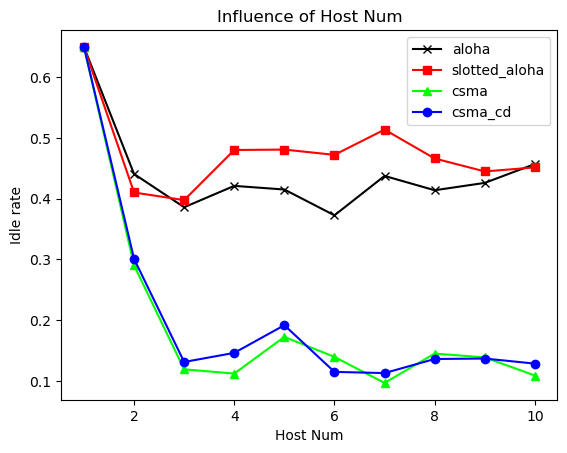

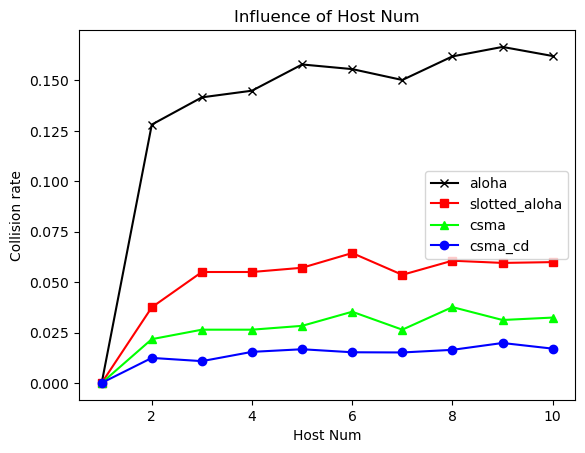

In [8]:
# Q6
host_num = [i for i in range(1, 11, 1)]
Q6_settings = [Setting(host_num=i) for i in host_num]
Q6 = whole_result()
Q6.test(Q6_settings)
Q6.plot('Influence of Host Num', 'Host Num', host_num)

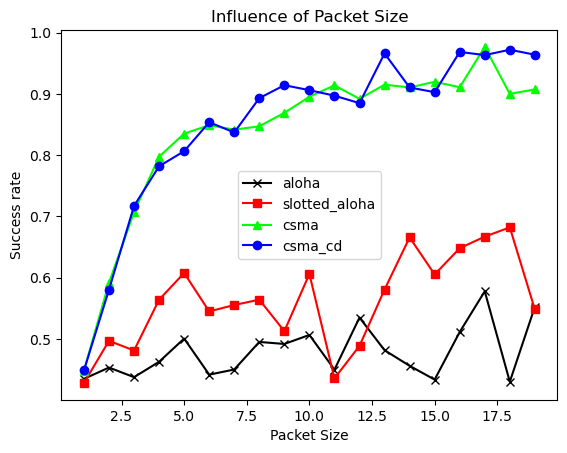

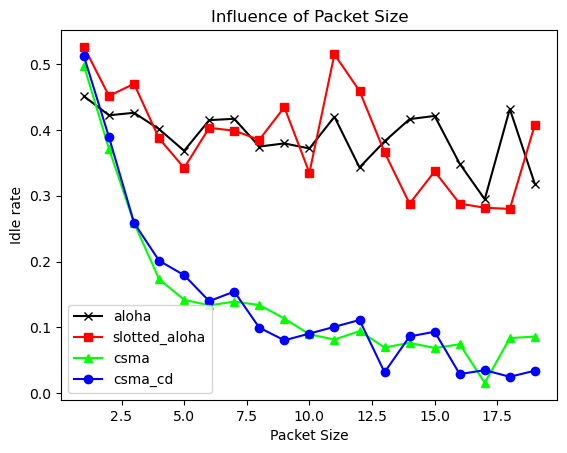

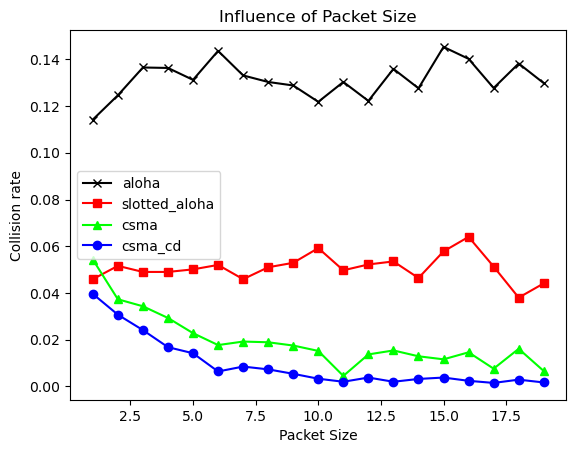

In [9]:
# Q7
pkt_sz = [i for i in range(1, 20)]
Q7_settings = [Setting(packet_size=i) for i in pkt_sz]
Q7 = whole_result()
Q7.test(Q7_settings)
Q7.plot('Influence of Packet Size', 'Packet Size', pkt_sz) 

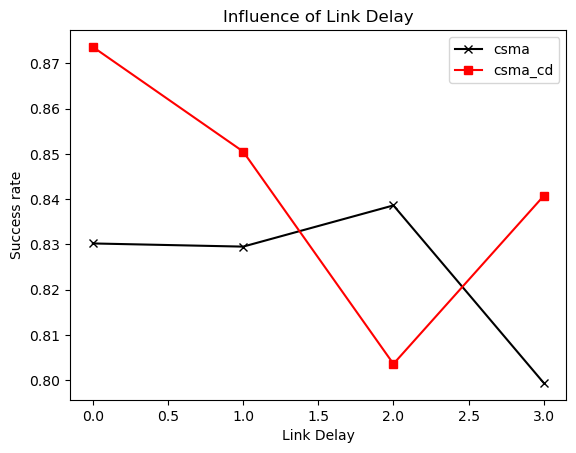

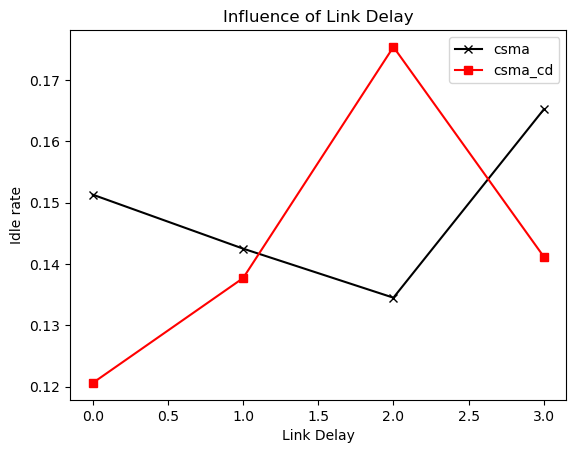

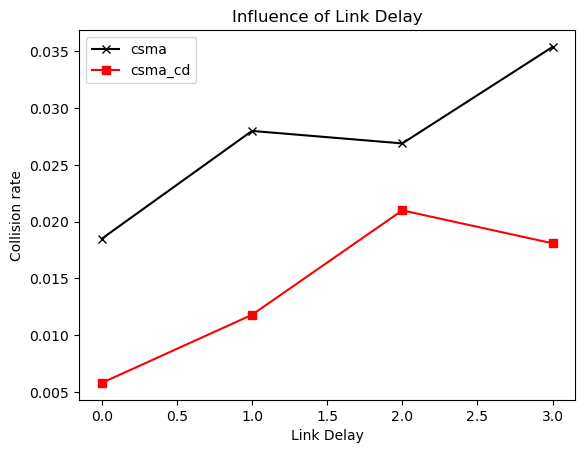

In [10]:
# Q8
link_delay_list= [0,1,2,3]
packet_size_list= [7,5,3,1]

Q8_settings = [Setting(link_delay=l, packet_size=p) for l,p in zip(link_delay_list, packet_size_list)]
Q8 = whole_result()
Q8.Q8_test(Q8_settings)
Q8.Q8_plot('Influence of Link Delay', 'Link Delay', link_delay_list)

